<a href="https://colab.research.google.com/github/TanmayShrivastava13/Credit-card-fraud-Detection/blob/main/Medical_insurance_cost_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/dirve')


Drive already mounted at /content/dirve; to attempt to forcibly remount, call drive.mount("/content/dirve", force_remount=True).


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data collection and analysis**

In [ ]:
dataset = pd.read_csv('/content/dirve/MyDrive/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.shape #number of rows and columns

(1338, 7)

once we give  new data to  our model it will predict the results, we will give data from  age to region then it will predict the price

In [ ]:
dataset.info() #getting info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we have 3 categorical columns in this  dataset
categorical features:
sex
smoke
Region

In [ ]:
dataset.isnull().sum()  # Checking for missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-9-ae13798dd6a1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["age"])


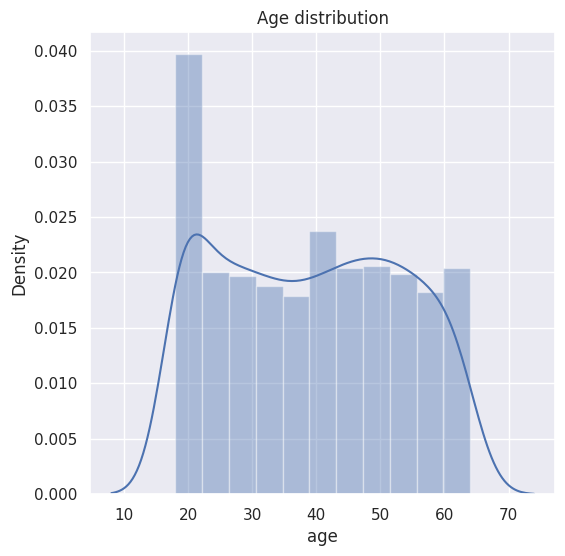

In [ ]:
#ditribution of age values
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(dataset["age"])
plt.title("Age distribution")
plt.show()




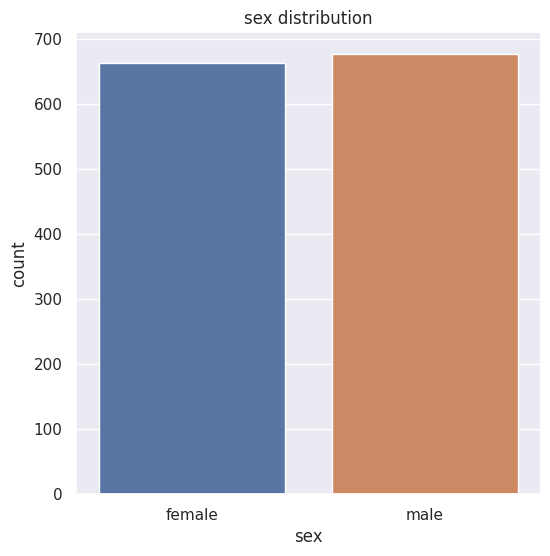

In [ ]:
#using countplot for categorical feature
#gender column
plt.figure(figsize = (6,6))
sns.countplot(x = "sex", data = dataset)
plt.title("sex distribution")
plt.show()


In [ ]:
dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-12-da7a82922ca8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["bmi"])


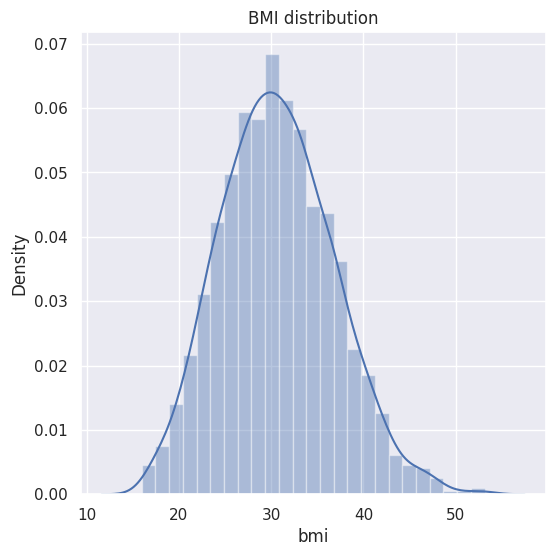

In [ ]:
#distribution for BMI
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(dataset["bmi"])
plt.title("BMI distribution")
plt.show()


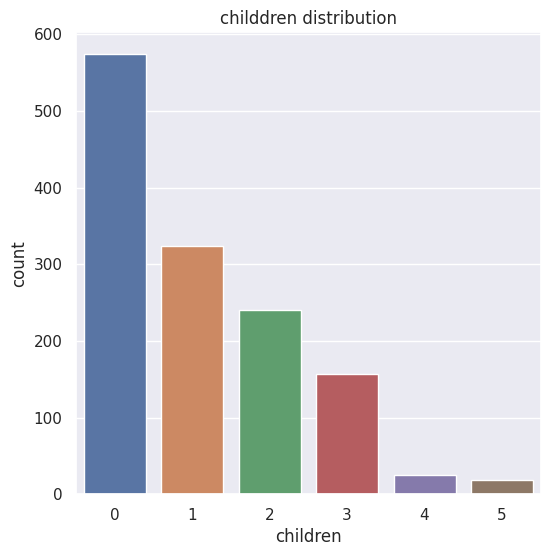

In [ ]:
#children
plt.figure(figsize = (6,6))
sns.countplot(x = "children", data = dataset)
plt.title("childdren distribution")
plt.show()


In [ ]:
dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

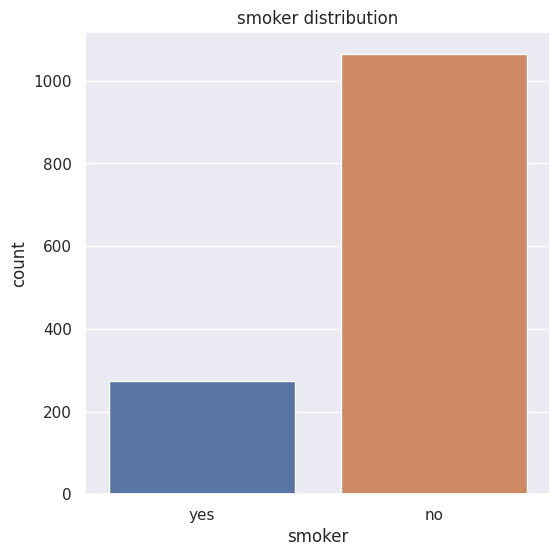

In [ ]:
#smoker
plt.figure(figsize = (6,6))
sns.countplot(x = "smoker", data = dataset)
plt.title("smoker distribution")
plt.show()

In [ ]:
dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

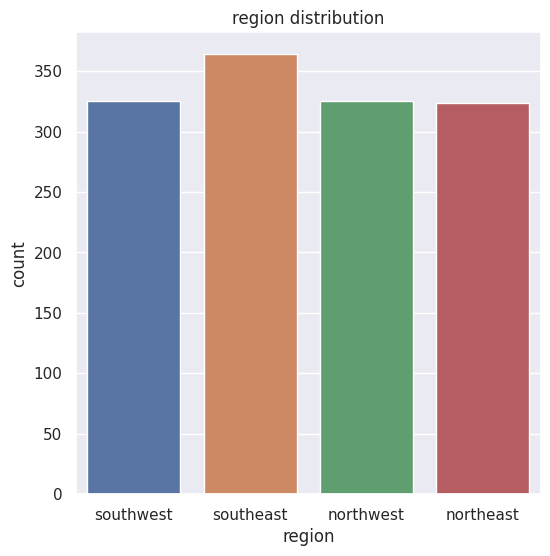

In [ ]:
#region colunm
plt.figure(figsize = (6,6))
sns.countplot(x = "region", data = dataset)
plt.title("region distribution")
plt.show()


In [ ]:
dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-19-c9f513102f00>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["charges"])


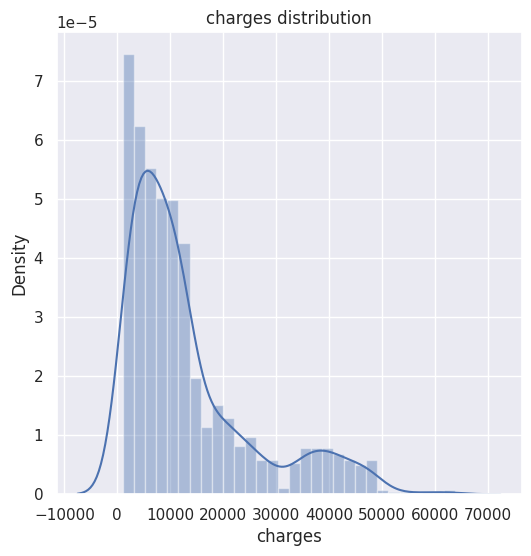

In [ ]:
#distrubution of charges column
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(dataset["charges"])
plt.title("charges distribution")
plt.show()



**Data preprocessing**

Encoding the features

In [ ]:
#encoding sex column
dataset.replace({'sex':{'male':0,'female': 1}}, inplace = True)


#encoding smoker column
dataset.replace({'smoker':{'yes':0,'no': 1}}, inplace = True)

#encoding region column
dataset.replace({'region':{'southeast':0,'southwest': 1,'northeast':2,'northwest':3}}, inplace = True)


**splitting the features and target**

In [ ]:
X = dataset.drop(columns = "charges", axis = 1)
Y = dataset["charges"]

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


**splitting the data  into training and testing**

In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


**MODEL TRAINING**

In [ ]:
#loading  linear regression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

**Model evaluation**

In [ ]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#Rsquared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)


In [ ]:
#Rsquared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(r2_test)

0.7447273869684076


**buidling a predictive system**

In [ ]:
input_data = (31, 1,25.74, 0, 1, 0)
#changing input data tuple to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)
print("The insurance cost is :",prediction[0])

[3760.0805765]
The insurance cost is : 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Implementing Random forest**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
training_data_prediction_rf = regressor_rf.predict(X_train)

In [ ]:
r2_train = metrics.r2_score(Y_train,training_data_prediction_rf)
print(r2_train)

0.977706057575761


In [ ]:
test_data_prediction_rf = regressor_rf.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(Y_test,test_data_prediction_rf)
print(r2_test)

0.8379498066720781


In [ ]:
#best model is random forest regression we need to take care of overfitting
input_data = (31, 1,25.74, 0, 1, 0)
#changing input data tuple to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction_rf = regressor_rf.predict(input_data_reshaped)
print(prediction_rf)
print("The insurance cost is :",prediction_rf[0])

[3733.774186]
The insurance cost is : 3733.7741860000056


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
